In [1]:

import matplotlib.pyplot as plt
import cv2
import numpy as np

In [ ]:
def equalize_histogram(image: np.ndarray) -> np.ndarray:
    if len(image.shape) > 2 and image.shape[2] == 3:
        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        
        h, s, v = cv2.split(hsv_image)
        v_equalized = cv2.equalizeHist(v)
        equalized_hsv = cv2.merge([h, s, v_equalized])
        equalized_image = cv2.cvtColor(equalized_hsv, cv2.COLOR_HSV2BGR)
        
        return equalized_image
    else:
        return cv2.equalizeHist(image)

In [98]:
def plot_hist_normalized(image: np.ndarray):
    equalized_image = equalize_histogram(image)

    fig, ax = plt.subplots(2, 2, figsize=(15, 10))
    
    # Imagem Original
    ax[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[0, 0].set_title('Imagem Original')
    ax[0, 0].axis('off')

    # Imagem Equalizada
    ax[0, 1].imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
    ax[0, 1].set_title('Imagem Equalizada (Método HSV)')
    ax[0, 1].axis('off')

    # Histograma da Imagem Original (Canal V)
    hsv_original = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist_original_v = cv2.calcHist([hsv_original], [2], None, [256], [0, 256]) # O canal V é o de índice 2
    ax[1, 0].plot(hist_original_v, color='black')
    ax[1, 0].set_title("Histograma Original (Canal V)")
    ax[1, 0].set_xlabel("Valor (Intensidade)")
    ax[1, 0].set_ylabel("Número de Pixels")
    ax[1, 0].set_xlim([0, 256])

    # Histograma da Imagem Equalizada (Canal V)
    hsv_equalized = cv2.cvtColor(equalized_image, cv2.COLOR_BGR2HSV)
    hist_equalized_v = cv2.calcHist([hsv_equalized], [2], None, [256], [0, 256])
    ax[1, 1].plot(hist_equalized_v, color='black')
    ax[1, 1].set_title("Histograma da Imagem Equalizada (Canal V)")
    ax[1, 1].set_xlabel("Valor (Intensidade)")
    ax[1, 1].set_xlim([0, 256])
    
    plt.tight_layout()
    plt.show() 


Criando o dataset com imagens equalizadas

In [99]:
import os 
BASE_DIR = 'dataset'
IMAGE_DIR = os.path.join(BASE_DIR, 'images')
OUTPUT_DIR = os.path.join('normalized_dataset', 'images')
os.makedirs(OUTPUT_DIR, exist_ok=True)
images = os.listdir(IMAGE_DIR)
print(images)
for image_name in images:
    image_path = os.path.join(IMAGE_DIR, image_name)
    image = cv2.imread(image_path)
    output_path = os.path.join(OUTPUT_DIR, image_name)
    out_image = equalize_histogram(image)
    cv2.imwrite(output_path, out_image)

['1-02-V1-W.png', '9-01-V1-W.png', '3-02-V2-B.png', '7-03-V2-W.png', '2-05-V1-W.png', '1-01-V1-B.png', '6-04-V1-W.png', '6-01-V2-W.png', '4-03-V2-W.png', '8-03-V2-B.png', '8-02-V1-B.png', '6-05-V1-W.png', '4-02-V1-W.png', '8-03-V2-W.png', '5-05-V2-W.png', '8-02-V2-B.png', '1-02-V2-B.png', '9-04-V2-W.png', '6-01-V2-B.png', '0-05-V2-B.png', '5-01-V1-W.png', '8-01-V2-W.png', '3-03-V2-B.png', '4-02-V2-B.png', '0-03-V1-W.png', '1-02-V1-B.png', '1-05-V2-W.png', '6-03-V2-B.png', '5-05-V2-B.png', '5-01-V2-B.png', '5-02-V1-W.png', '8-04-V2-B.png', '1-05-V2-B.png', '9-02-V1-W.png', '8-05-V1-W.png', '7-02-V2-B.png', '0-05-V1-B.png', '4-04-V2-B.png', '0-01-V1-B.png', '0-04-V2-B.png', '3-02-V1-B.png', '2-05-V2-W.png', '6-05-V1-B.png', '7-05-V1-B.png', '5-04-V1-W.png', '3-02-V1-W.png', '4-05-V2-B.png', '1-01-V2-B.png', '9-05-V1-W.png', '7-05-V1-W.png', '8-05-V2-B.png', '3-03-V2-W.png', '3-01-V2-B.png', '7-01-V2-W.png', '9-01-VW-B.png', '1-04-V1-W.png', '4-02-V2-W.png', '5-04-V2-W.png', '6-04-V1-B.pn

In [43]:
samples = os.listdir(IMAGE_DIR)[:5]
print(samples)

['1-02-V1-W.png', '9-01-V1-W.png', '3-02-V2-B.png', '7-03-V2-W.png', '2-05-V1-W.png']


Exemplos de imagens equalizadas

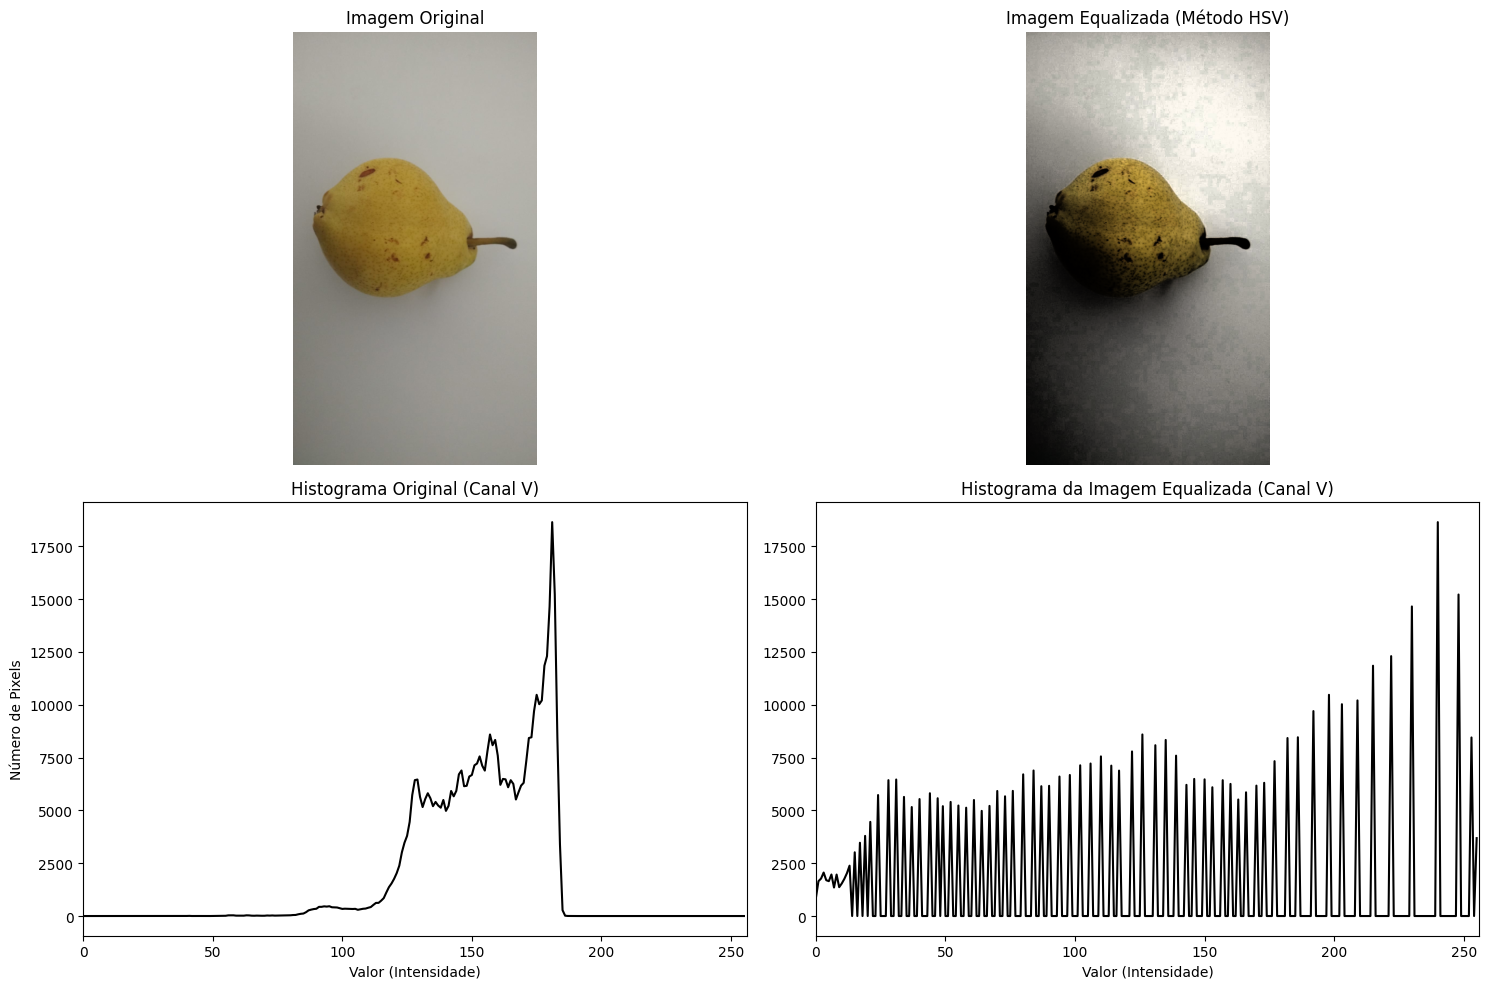

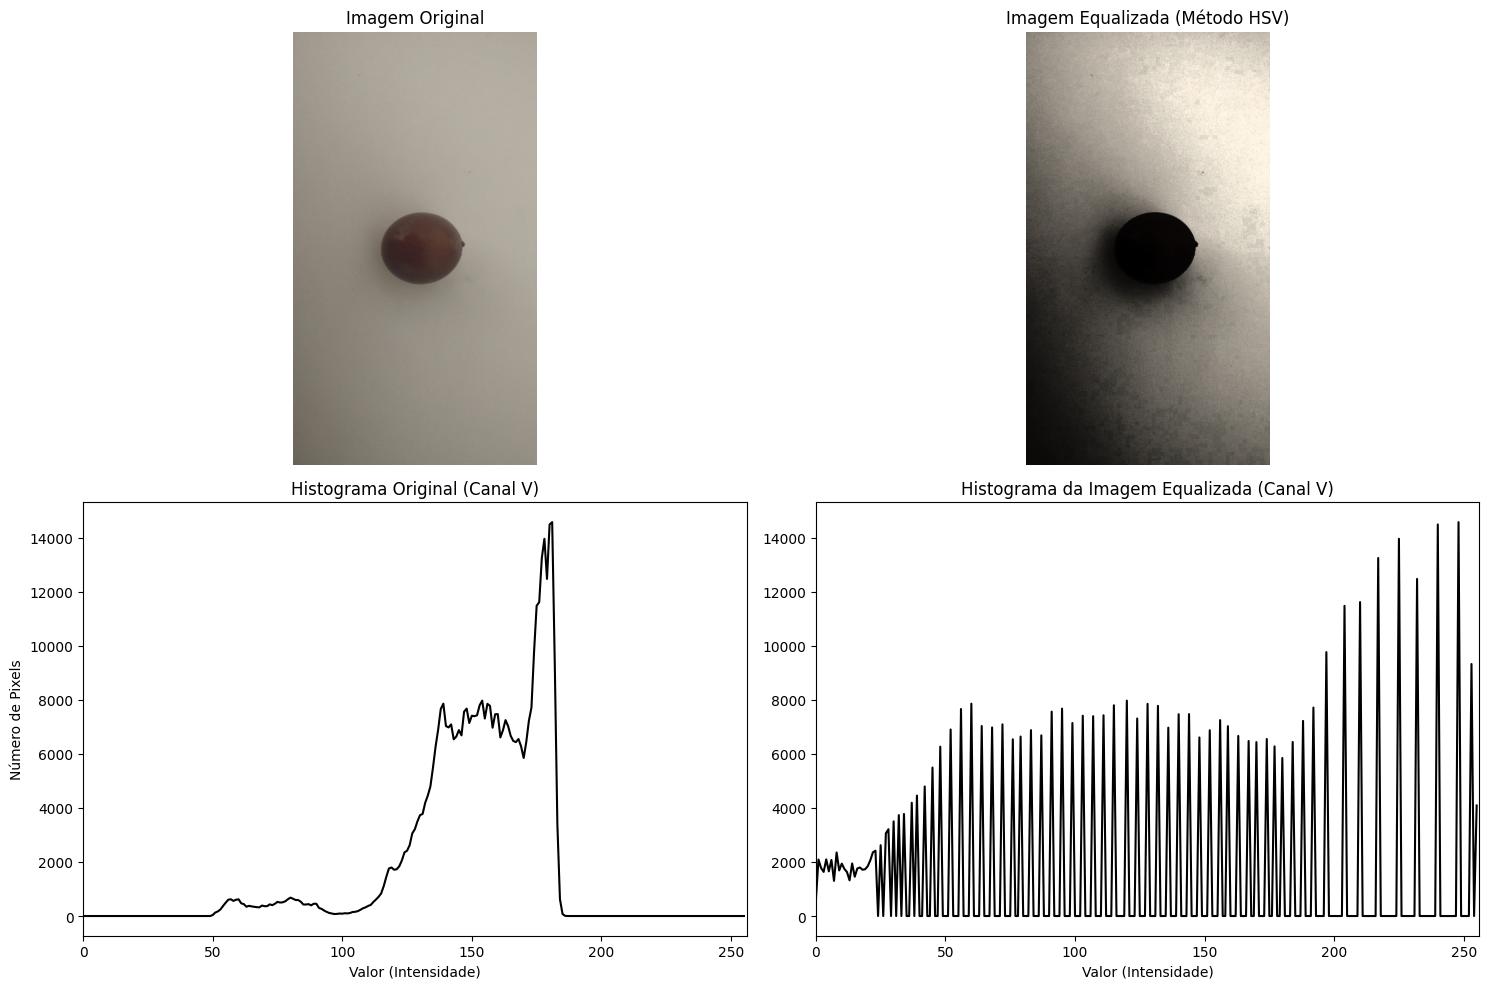

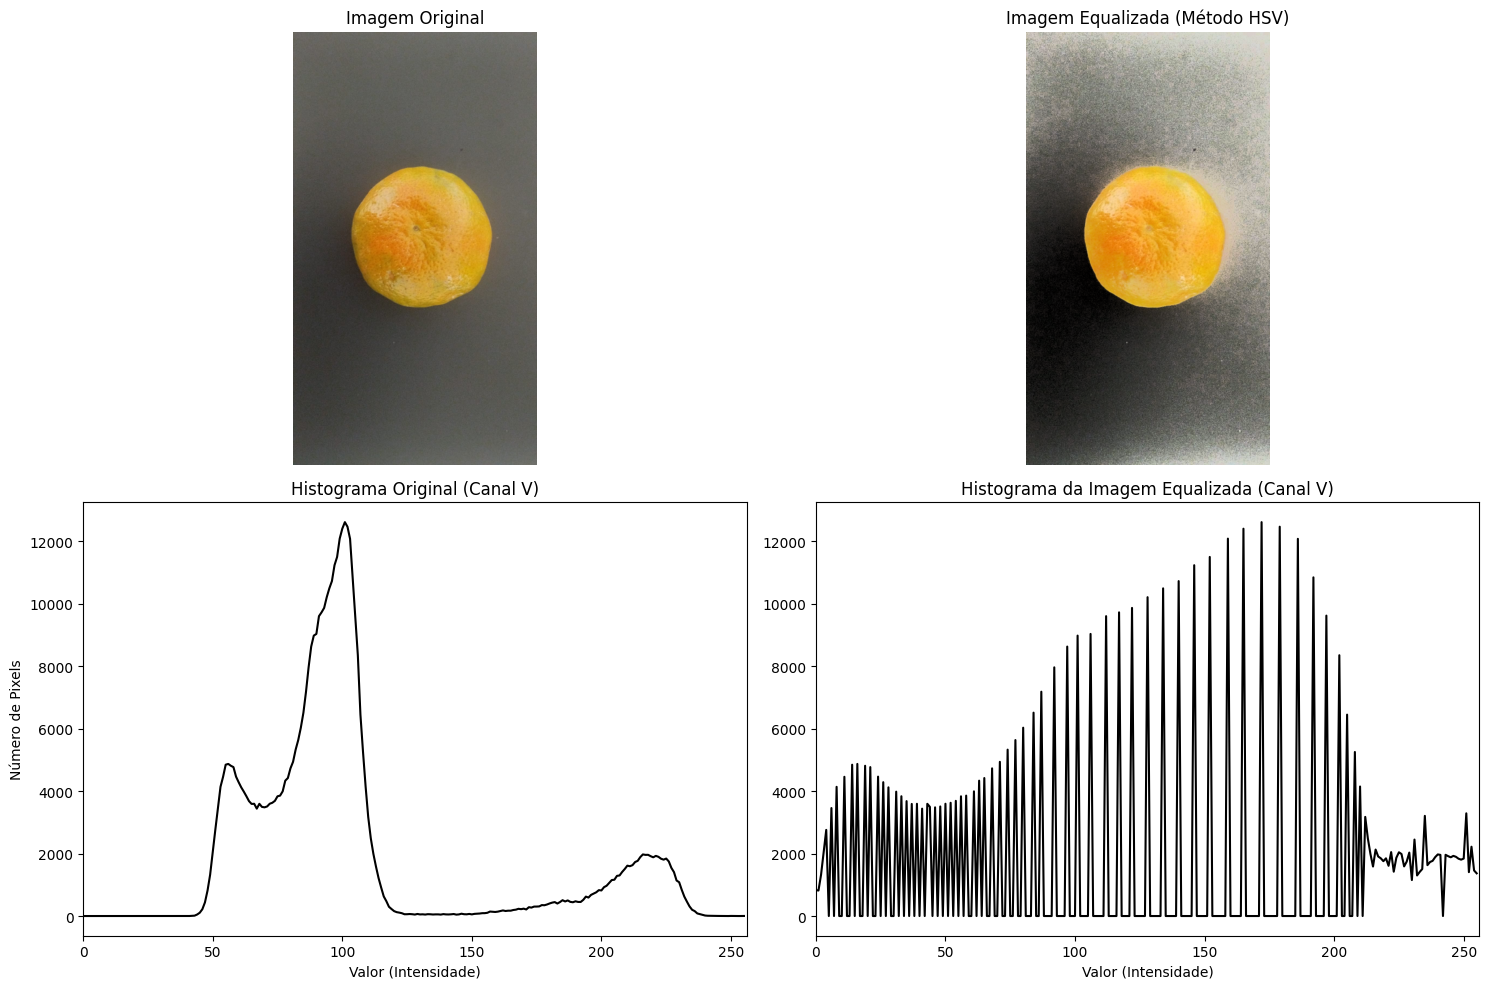

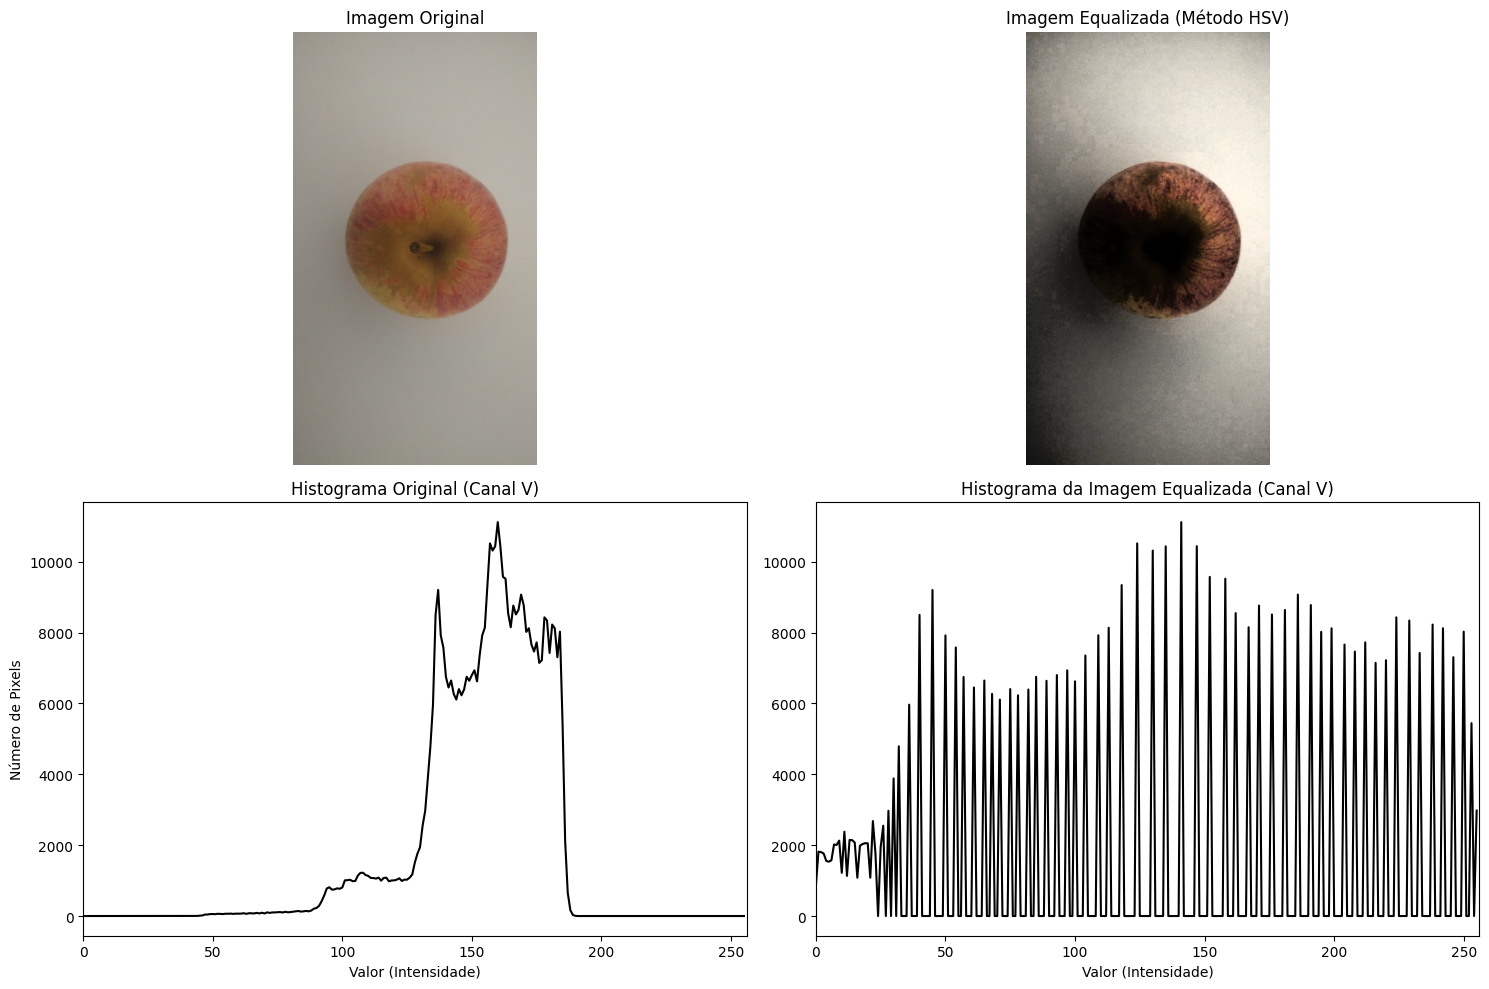

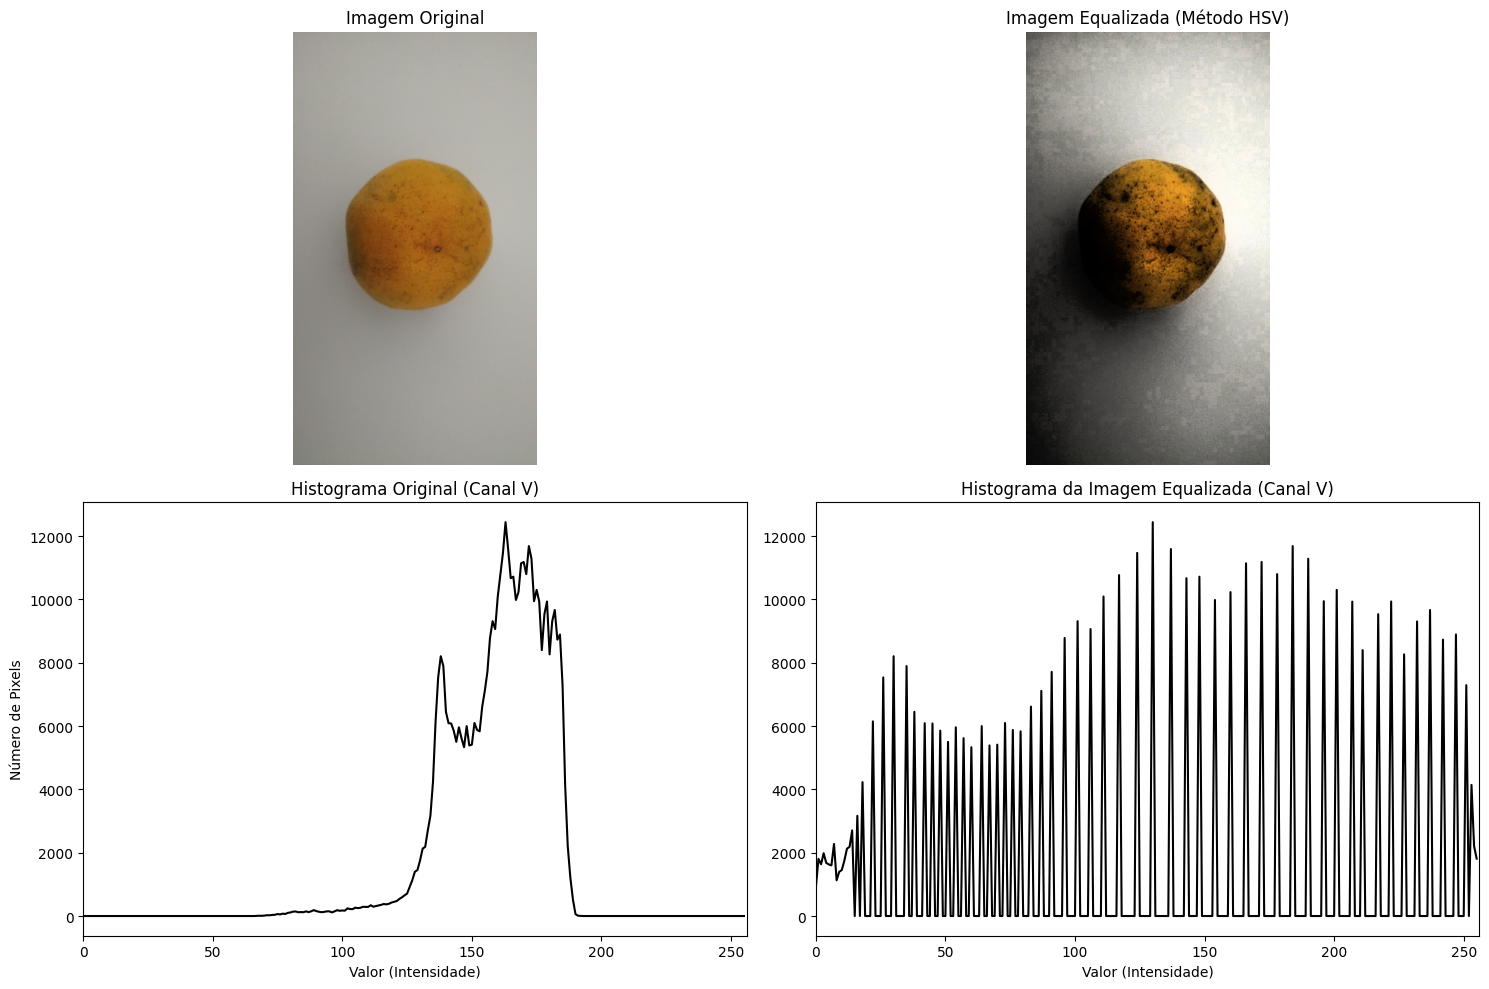

In [100]:
for sample in samples:
    image_path = os.path.join(IMAGE_DIR, sample)
    image = cv2.imread(image_path) 
    plot_hist_normalized(image)
    

In [101]:
PROTOTYPE_DIM = (910, 512)

In [102]:
def calculate_class_statistics(class_path: str, begin_id: str):
    image_files = [os.path.join(class_path, f) for f in os.listdir(class_path) if f.startswith(begin_id) and f.endswith(('.png', '.jpg', '.jpeg'))]
    image_count = len(image_files)

    first_img = cv2.imread(image_files[0])
    h, w, _ = first_img.shape

    sum_prototype_v = np.zeros((h, w), dtype=np.float64)

    for img_file in image_files:
        img_bgr = cv2.imread(img_file)
        if img_bgr is None or img_bgr.shape[:2] != (h, w):
            print(f"Aviso: Pulando imagem com formato inválido ou diferente: {img_file}")
            continue

        hsv_image = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
        v_channel = hsv_image[:, :, 2]

        sum_prototype_v += v_channel.astype(np.float64)
        

    mean_prototype_v = (sum_prototype_v / image_count).astype(np.uint8)
    
    return mean_prototype_v

In [103]:
def plot_prototype_and_histogram(class_name: str, prototype_v: np.ndarray):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle(f'Protótipo e Histograma para a Classe: {class_name}', fontsize=16)

    ax1.imshow(prototype_v, cmap='gray')
    ax1.set_title("Protótipo Médio (Canal V)")
    ax1.axis('off')

    hist = cv2.calcHist([prototype_v], [0], None, [256], [0, 256])
    
    ax2.plot(hist, color='black')
    ax2.set_title("Histograma do Protótipo")
    ax2.set_xlabel("Valor (Intensidade)")
    ax2.set_ylabel("Número de Pixels")
    ax2.set_xlim([0, 256])
    ax2.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


Estastísticas do dataset com histograma normalizado

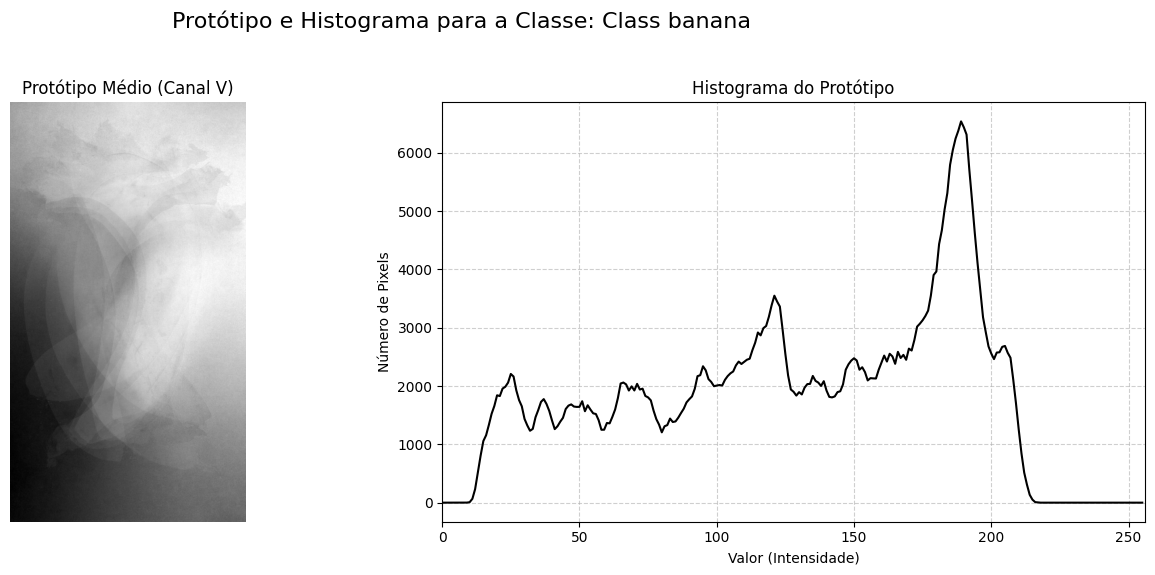

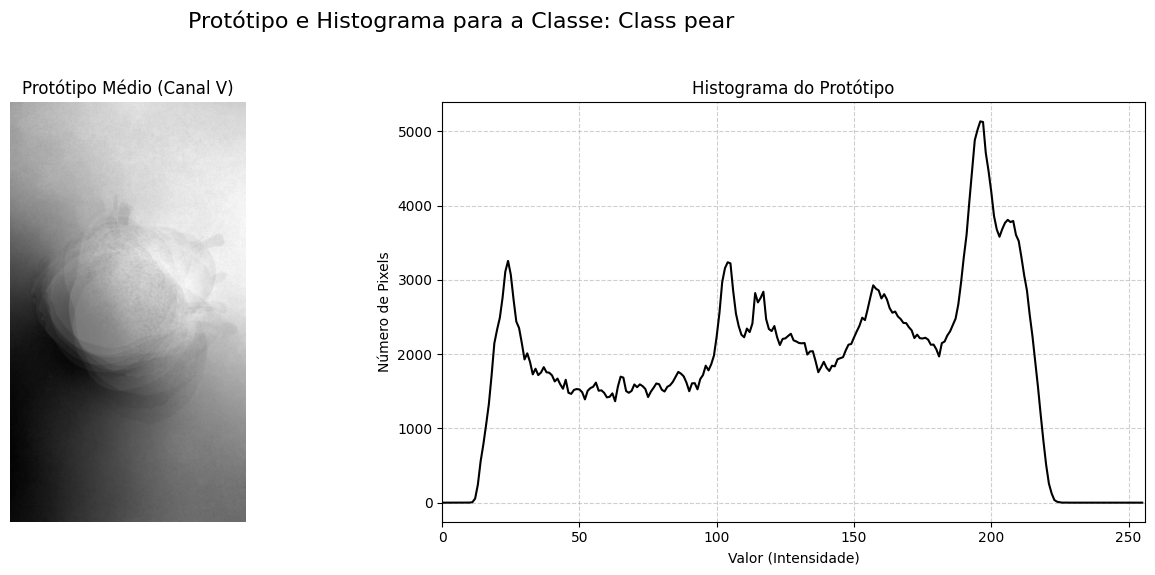

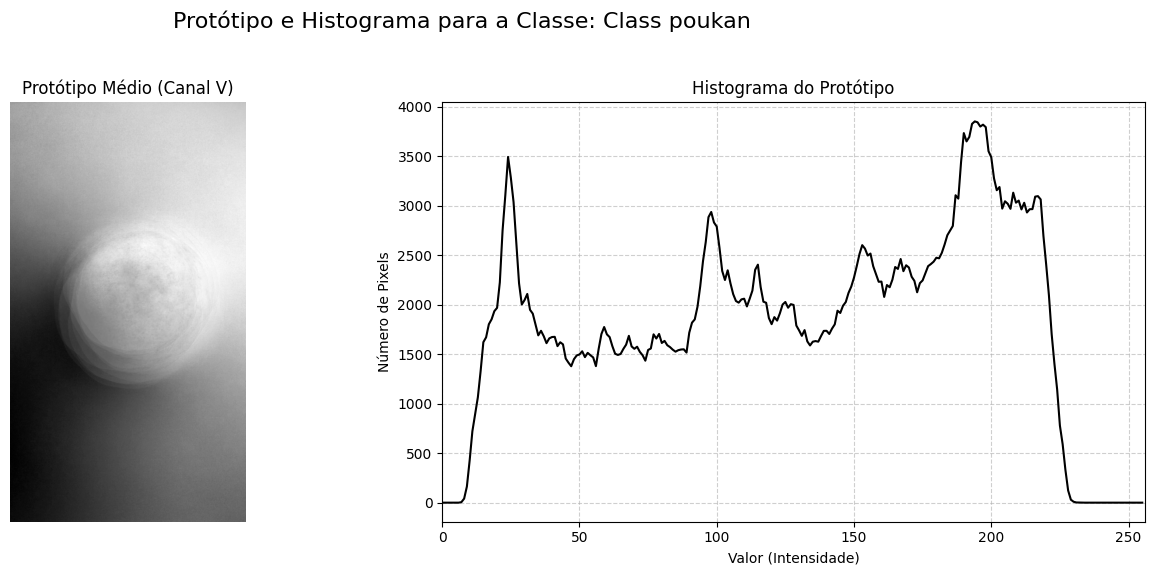

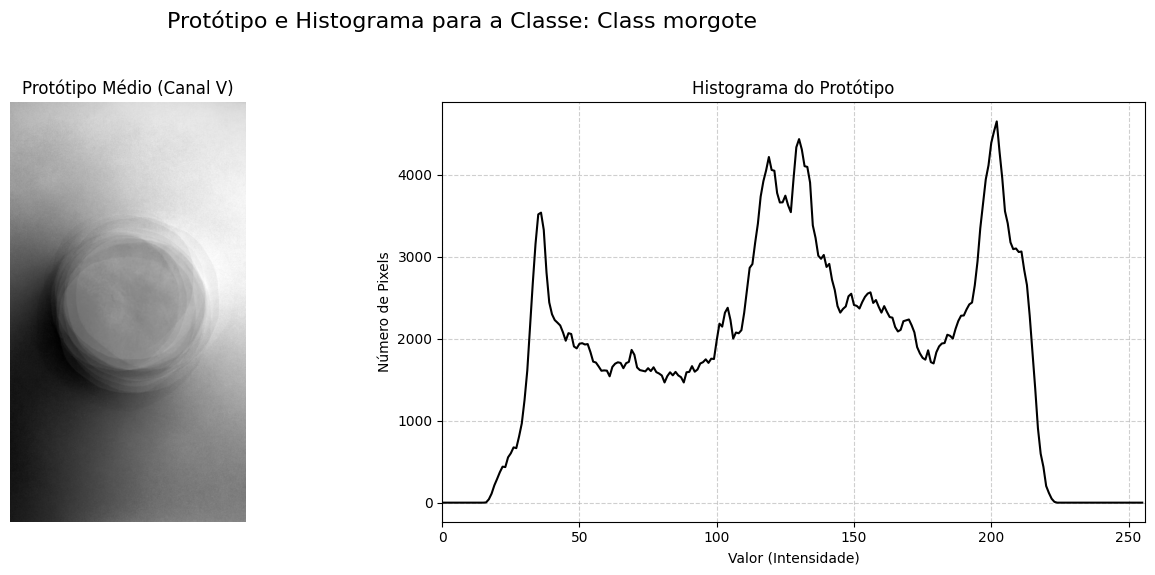

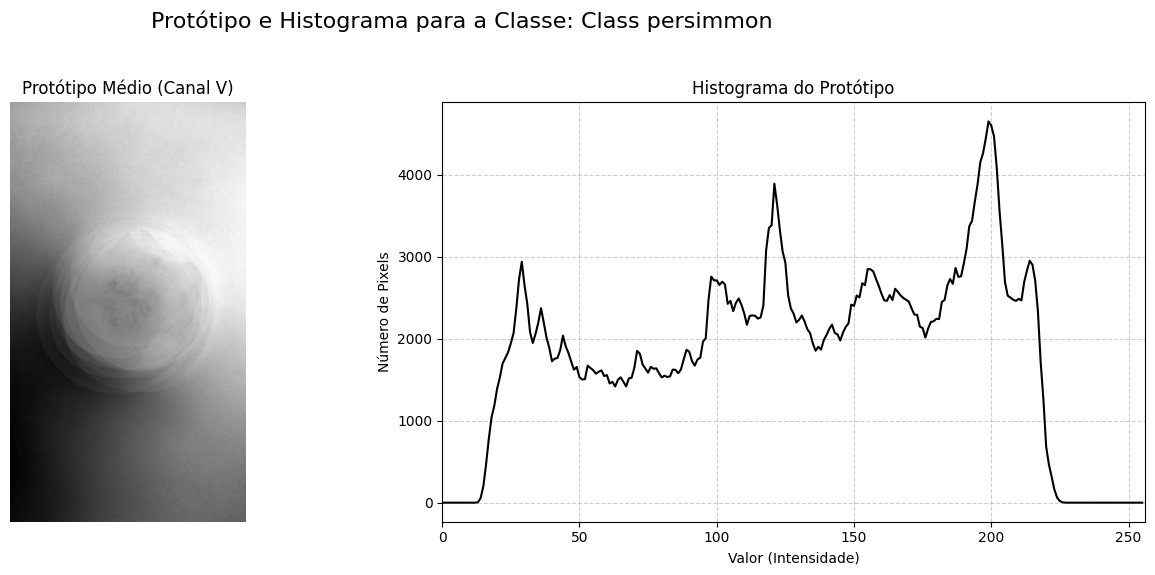

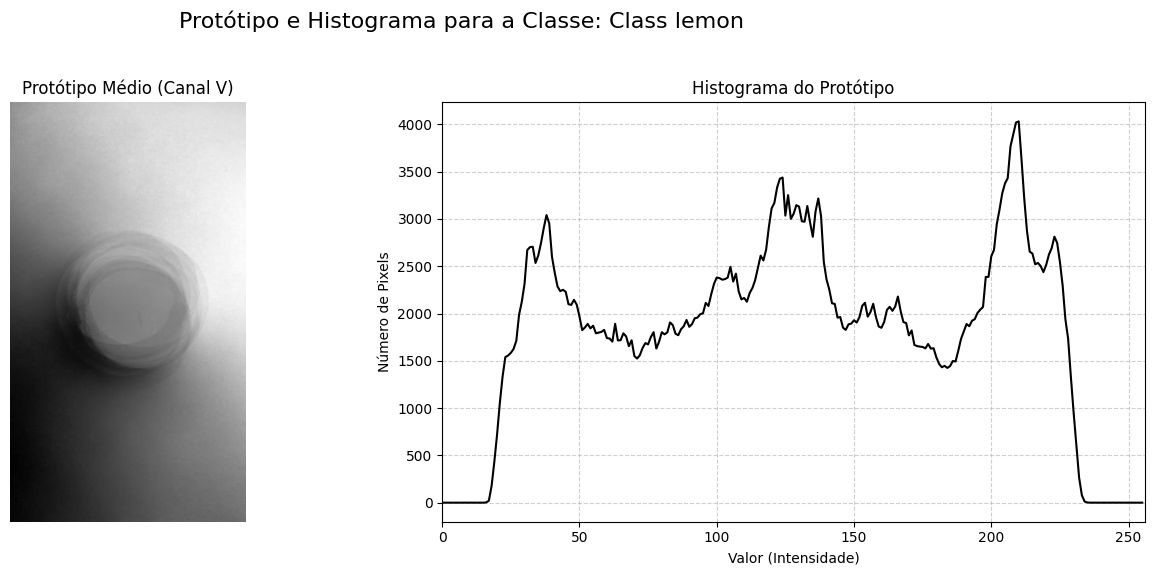

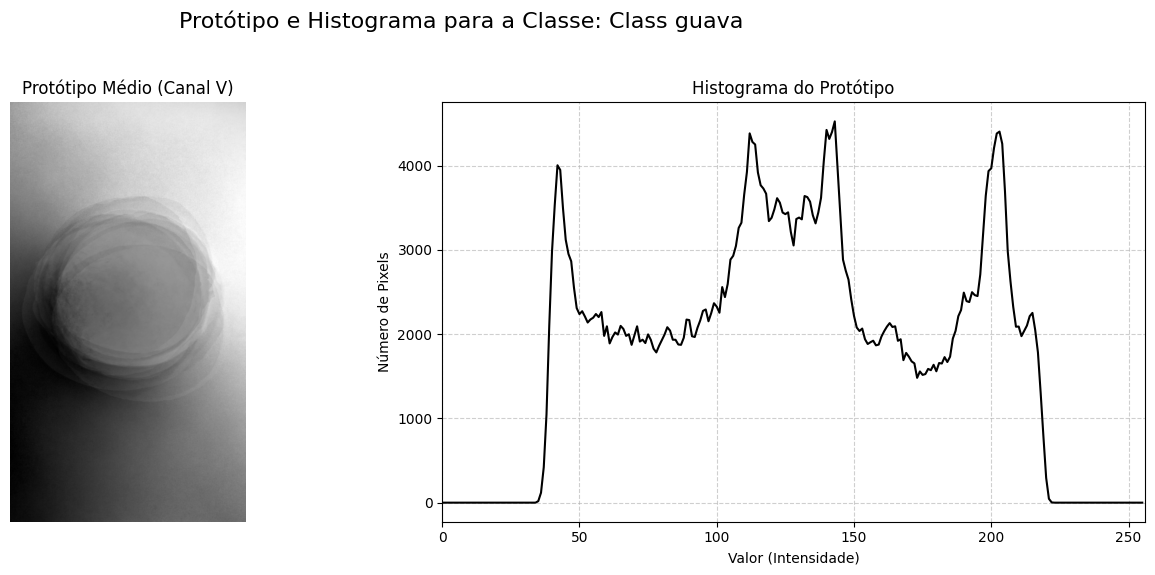

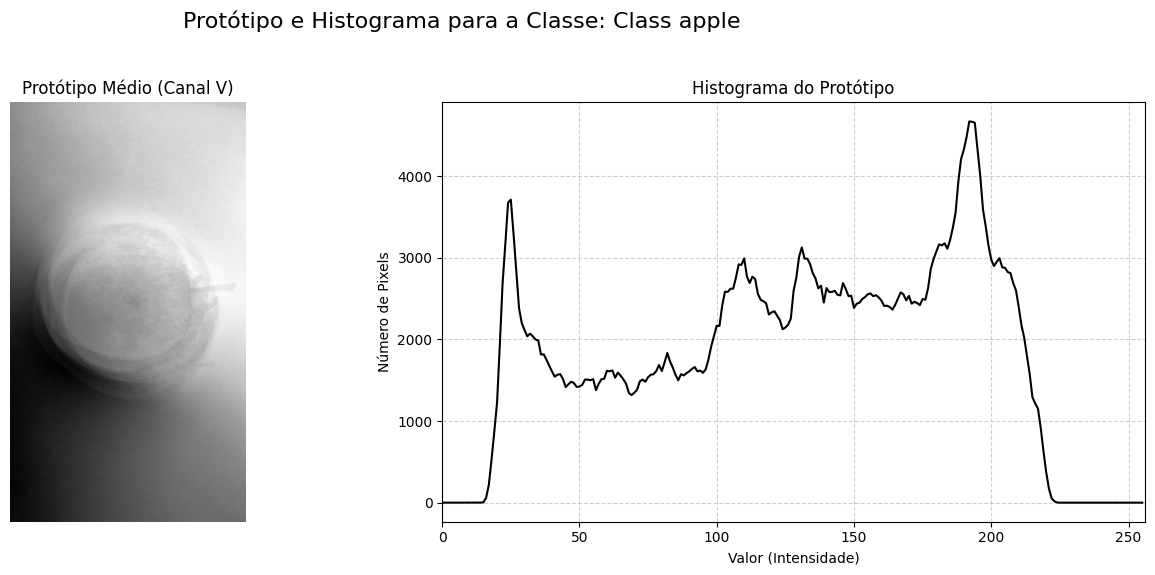

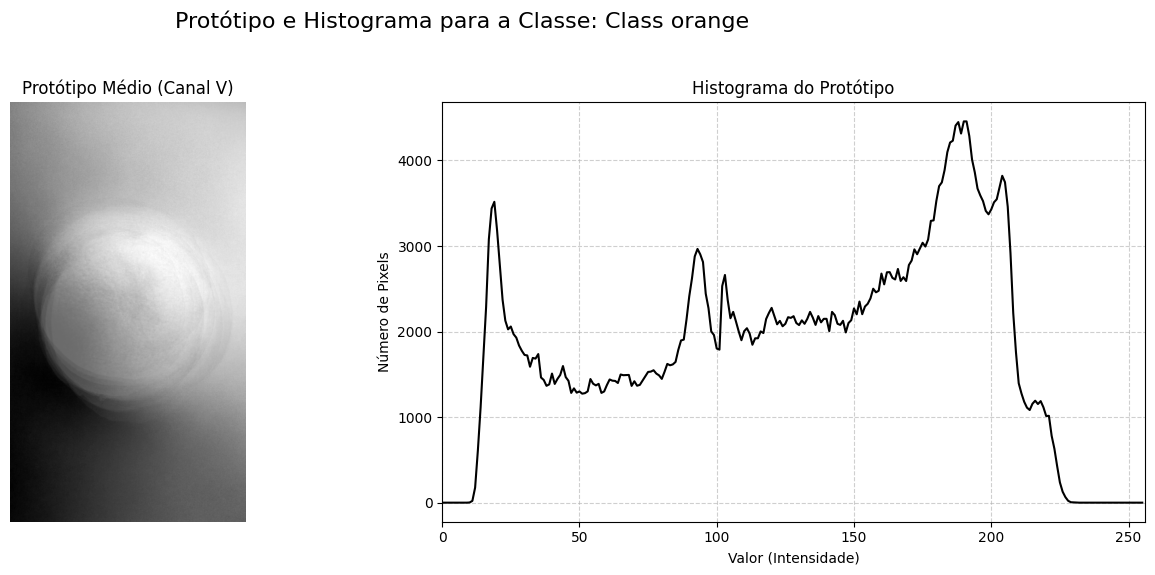

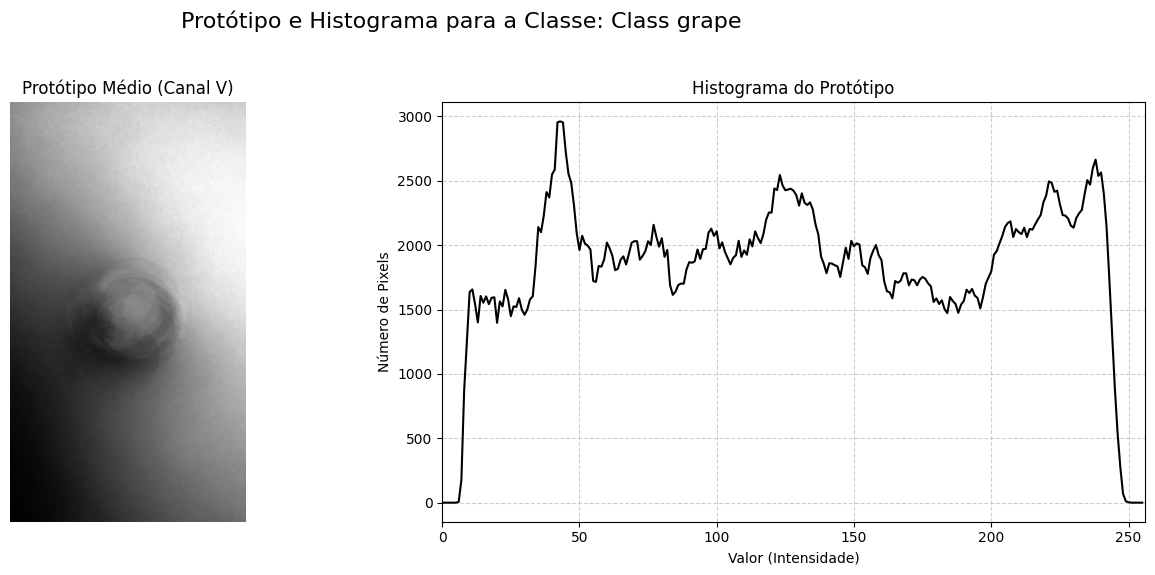

In [104]:
classes = {
    '0': 'banana',
    '1': 'pear',
    '2': 'poukan',
    '3': 'morgote',
    '4': 'persimmon',
    '5': 'lemon',
    '6': 'guava',
    '7': 'apple',
    '8': 'orange',
    '9': 'grape'
}
for i in range(10):
    p = calculate_class_statistics(os.path.join(OUTPUT_DIR), str(i))
    plot_prototype_and_histogram(f'Class {classes[str(i)]}', p)

Estatísticas do dataset original

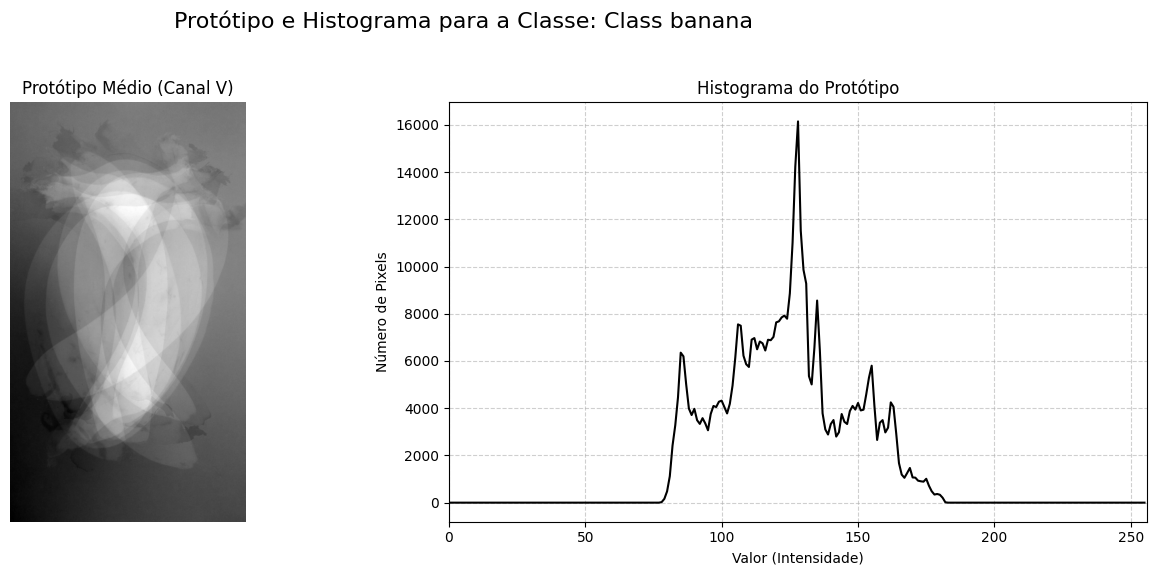

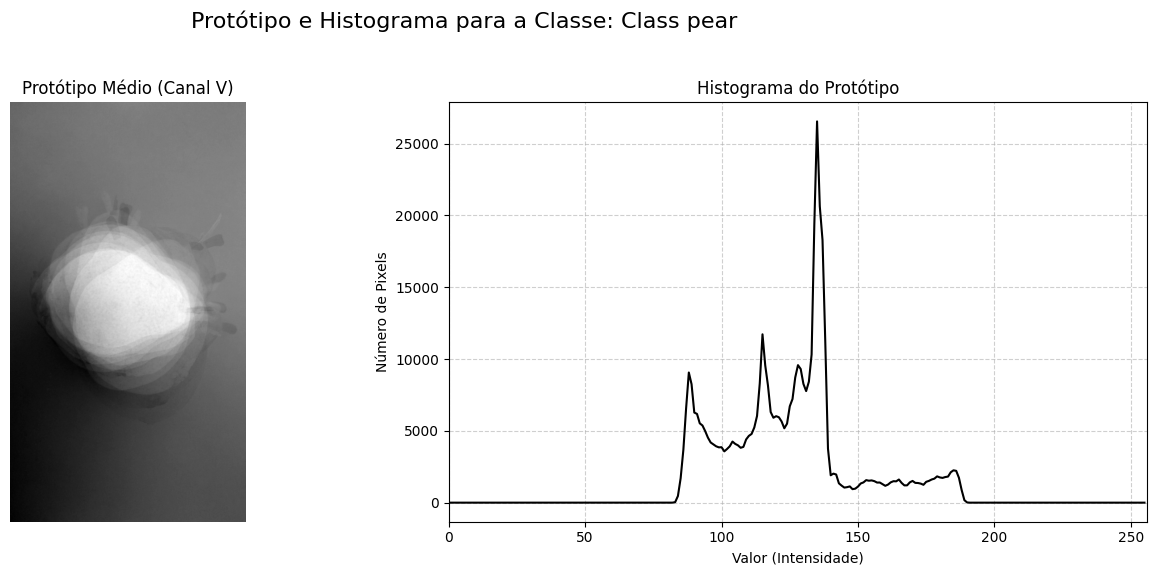

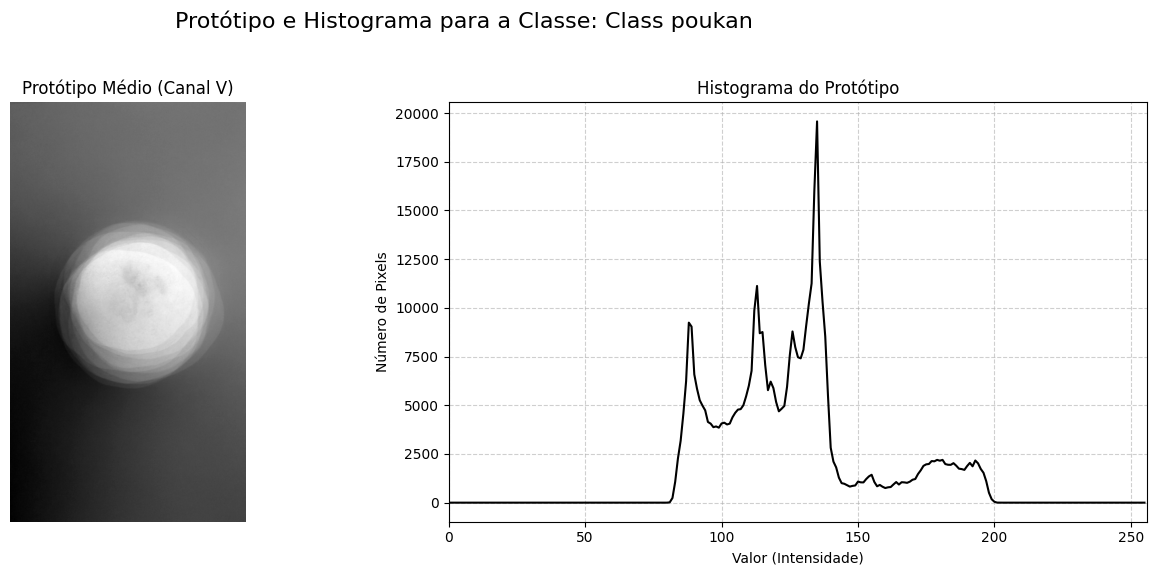

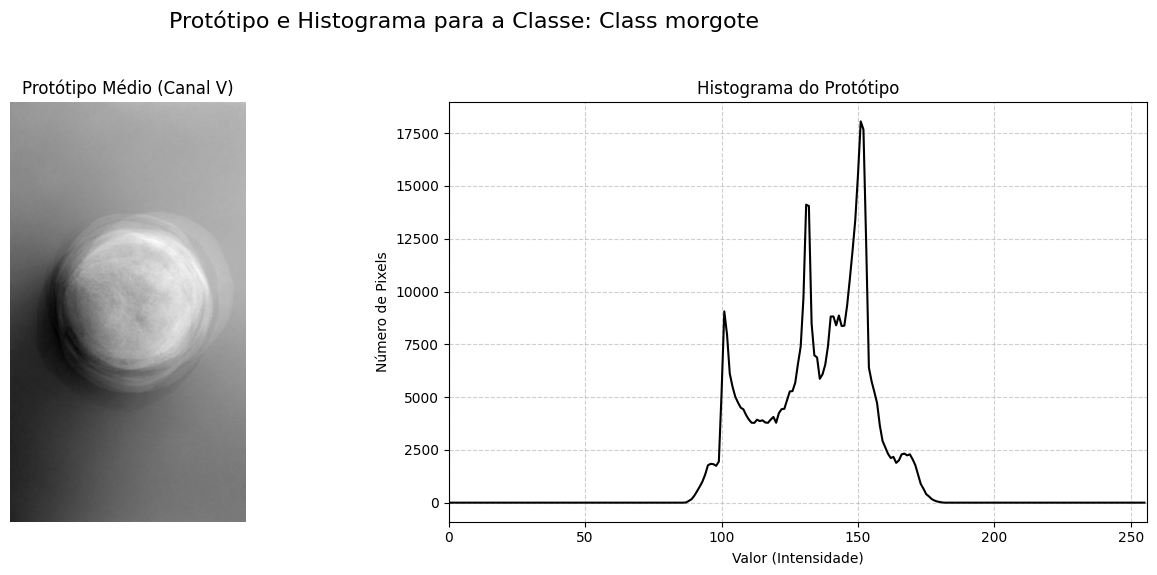

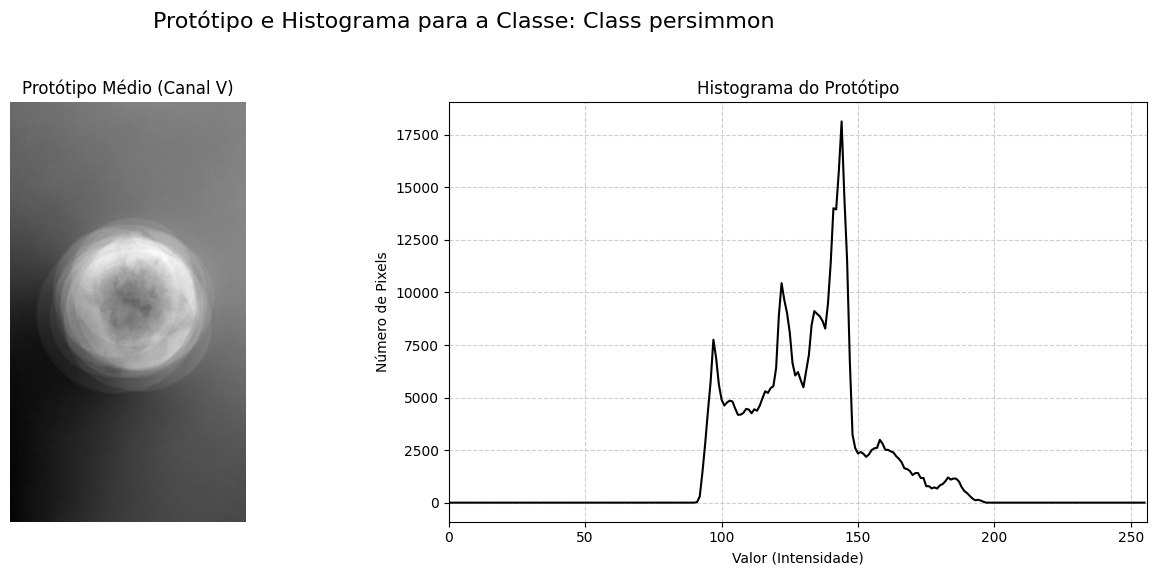

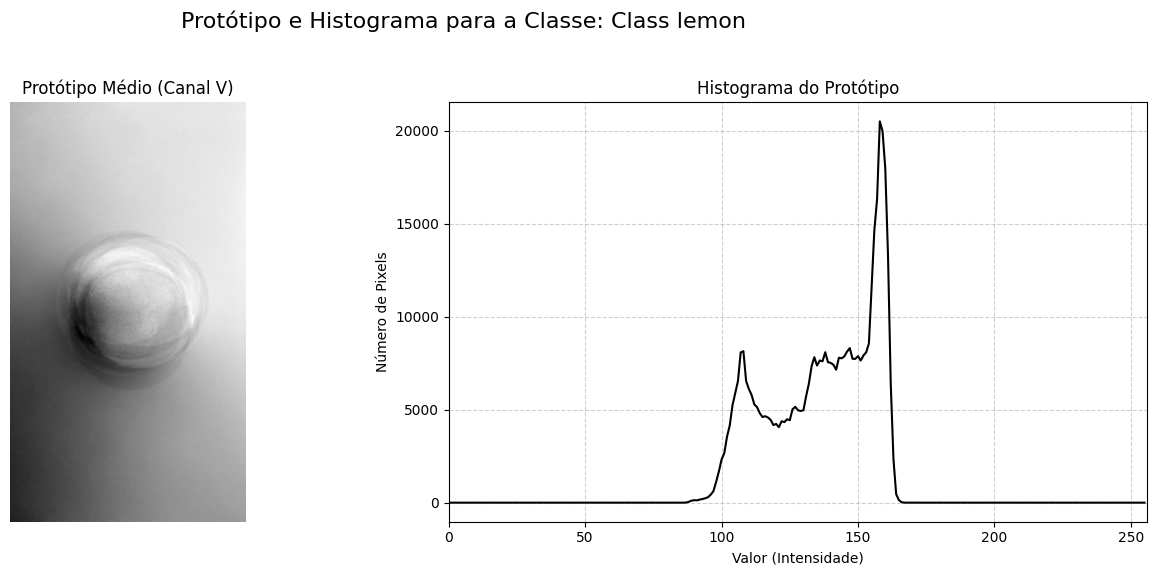

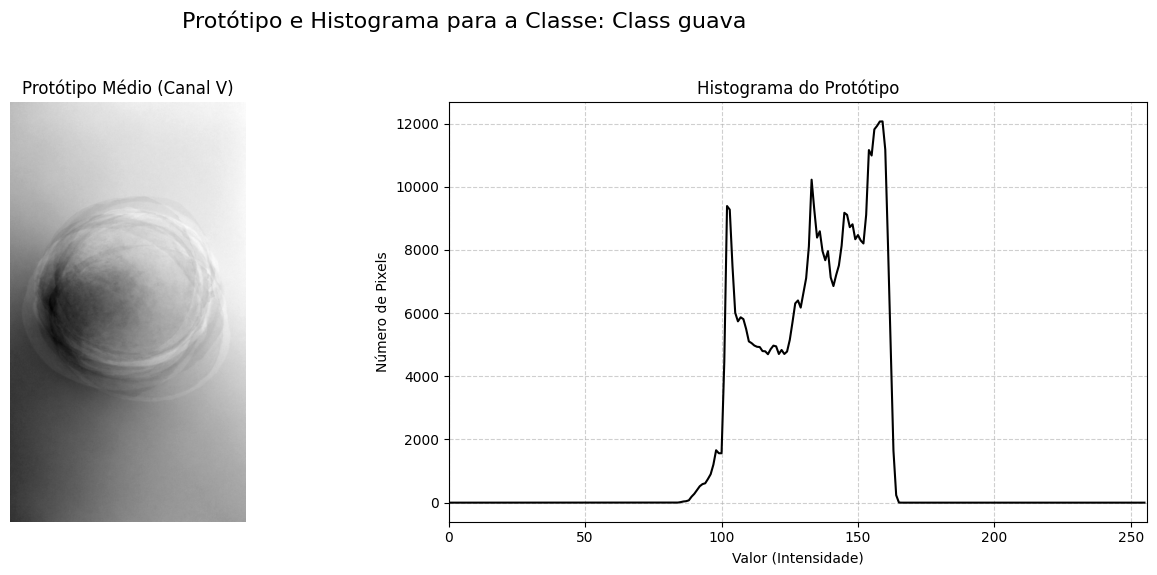

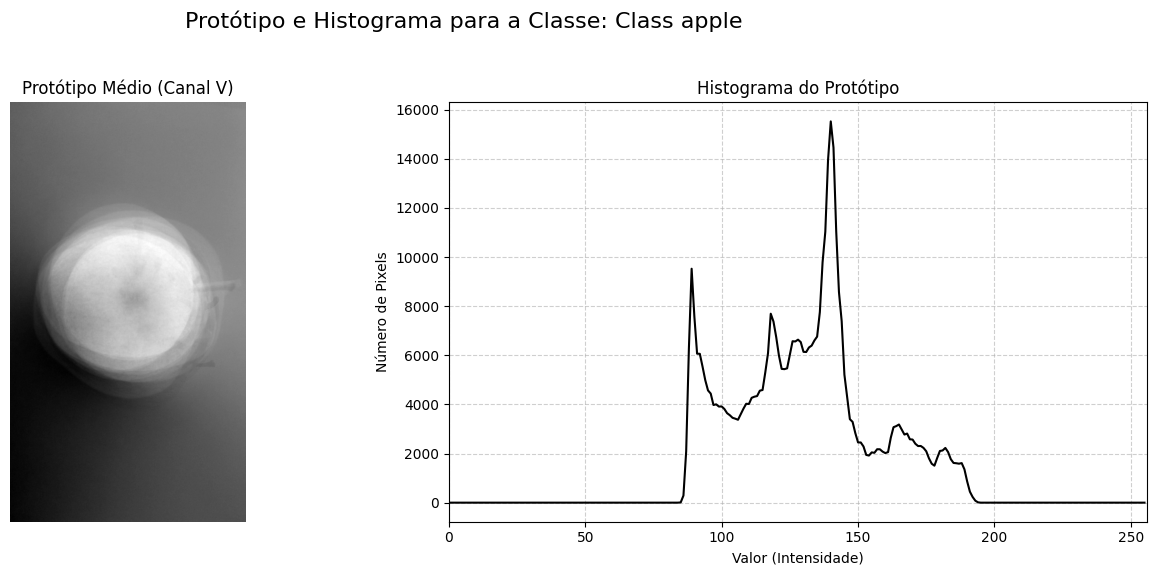

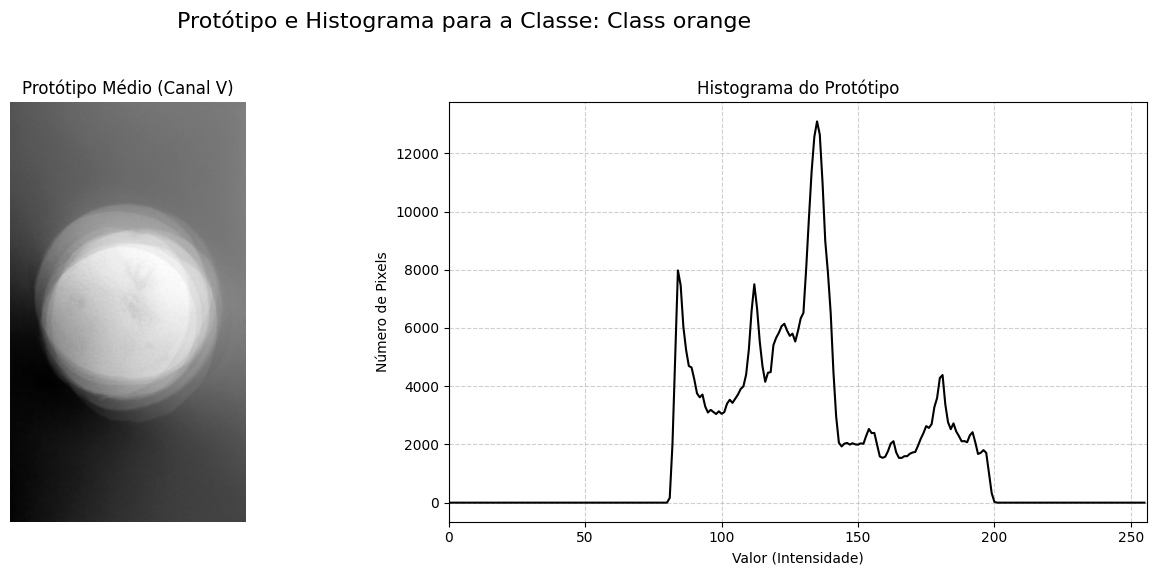

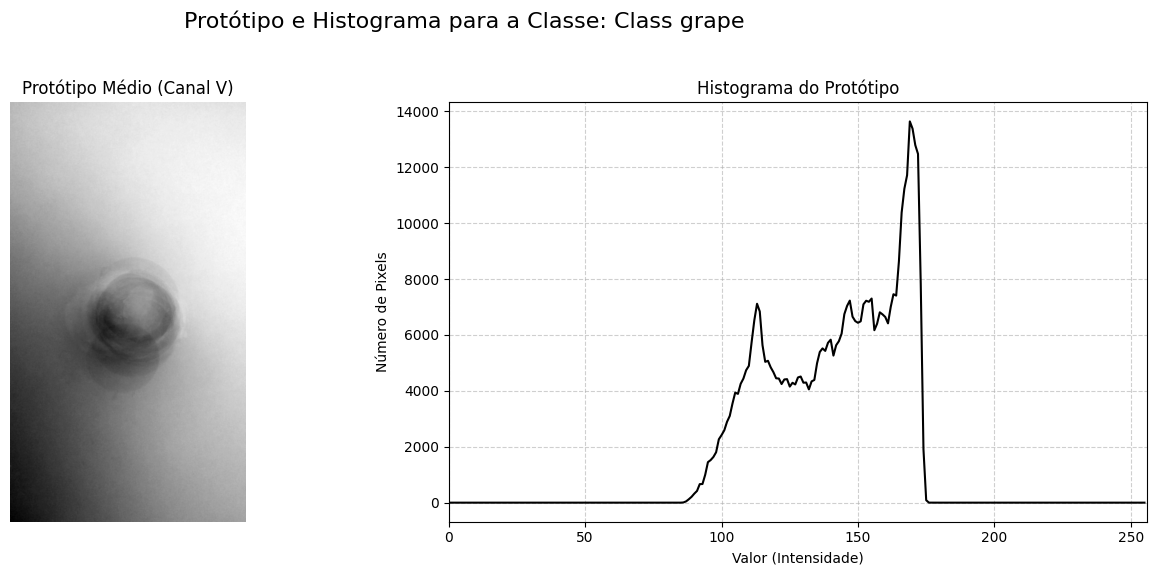

In [105]:
for i in range(10):
    p= calculate_class_statistics(os.path.join(BASE_DIR, 'images'), str(i))
    plot_prototype_and_histogram(f'Class {classes[str(i)]}', p)